# Import library

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

# Load Dataset

In [14]:
IMAGE_SIZE = 264
CHANNELS = 3
BATCH_SIZE = 32

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
)

Found 2592 images belonging to 4 classes.


In [5]:
train_generator.class_indices

{'Benign': 0,
 '[Malignant] Pre-B': 1,
 '[Malignant] Pro-B': 2,
 '[Malignant] early Pre-B': 3}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Benign', '[Malignant] Pre-B', '[Malignant] Pro-B', '[Malignant] early Pre-B']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.70379937 0.70888466 0.8724268 ]
  [0.70500445 0.7082822  0.8736319 ]
  [0.7062095  0.7076796  0.8748369 ]
  ...
  [0.8951301  0.8686915  0.9253622 ]
  [0.8990051  0.8745099  0.91952056]
  [0.89552593 0.8699135  0.9390935 ]]

 [[0.7167395  0.7127597  0.89127845]
  [0.7137269  0.7121572  0.88706076]
  [0.7107142  0.71155465 0.8828431 ]
  ...
  [0.89573264 0.86989653 0.9229522 ]
  [0.89960766 0.8745099  0.92313576]
  [0.8913083  0.86690086 0.94029856]]

 [[0.7186595  0.7108164  0.87185675]
  [0.719262   0.71141887 0.87727946]
  [0.71986455 0.7120214  0.88270223]
  ...
  [0.8963351  0.8711016  0.92054206]
  [0.90021014 0.8745099  0.92675084]
  [0.88709056 0.86388826 0.9415036 ]]

 ...

 [[0.9405224  0.9366008  0.99575144]
  [0.94726896 0.94859946 1.        ]
  [0.95021045 0.9512371  1.        ]
  ...
  [0.95856696 0.95242786 0.99045277]
  [0.95916945 0.95363295 0.9898503 ]
  [0.959772   0.954838   0.98924774]]

 [[0.9429325  0.9390109  0.99695647]
  [0.9466665  0.9498045  1.        ]


In [16]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 322 images belonging to 4 classes.


In [22]:
test_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 328 images belonging to 4 classes.


In [18]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.8941177  0.91148645 0.9204555 ]
  [0.8941177  0.91115934 0.91914684]
  [0.8941177  0.9108321  0.91783816]
  ...
  [0.8491466  0.89019614 0.95520765]
  [0.84146845 0.8789324  0.9658738 ]
  [0.834181   0.87282735 0.97031   ]]

 [[0.8941177  0.91372555 0.92774296]
  [0.8941177  0.91372555 0.9280702 ]
  [0.8941177  0.91372555 0.9283973 ]
  ...
  [0.84718364 0.89019614 0.9555348 ]
  [0.8417957  0.8772965  0.96718246]
  [0.83287233 0.8731545  0.96998286]]

 [[0.89246255 0.9120704  0.9238351 ]
  [0.8927897  0.91239756 0.92416227]
  [0.8931169  0.91272473 0.92448944]
  ...
  [0.8452206  0.89019614 0.955862  ]
  [0.8421228  0.8756607  0.96849114]
  [0.83156365 0.8734817  0.96965563]]

 ...

 [[0.6905782  0.69777536 0.9095401 ]
  [0.71981245 0.7492924  0.9641006 ]
  [0.7472631  0.7815564  0.99507767]
  ...
  [0.63629496 0.6597427  0.86266345]
  [0.63662213 0.6587612  0.8613548 ]
  [0.6369493  0.6577797  0.86004615]]

 [[0.6931956  0.70268285 0.91444755]
  [0.7217754  0.75190973 0.9676994 ]


## Building the Model

In [26]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 262, 262, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 131, 131, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 129, 129, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

### Compiling the Model

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
2592/32

81.0

In [30]:
322/32

10.0625

In [32]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=10,
)

Epoch 1/10
20/20 [==============================] - 88s 4s/step - loss: 1.2795 - accuracy: 0.3219 - val_loss: 1.0634 - val_accuracy: 0.4792
Epoch 2/10
20/20 [==============================] - 86s 4s/step - loss: 0.8800 - accuracy: 0.6609 - val_loss: 0.6641 - val_accuracy: 0.7604
Epoch 3/10
20/20 [==============================] - 82s 4s/step - loss: 0.6733 - accuracy: 0.7281 - val_loss: 0.5083 - val_accuracy: 0.7448
Epoch 4/10
20/20 [==============================] - 81s 4s/step - loss: 0.5326 - accuracy: 0.7828 - val_loss: 0.5435 - val_accuracy: 0.7500
Epoch 5/10
20/20 [==============================] - 86s 4s/step - loss: 0.4922 - accuracy: 0.7594 - val_loss: 0.4571 - val_accuracy: 0.7656
Epoch 6/10
20/20 [==============================] - 86s 4s/step - loss: 0.5638 - accuracy: 0.7344 - val_loss: 0.4711 - val_accuracy: 0.8177
Epoch 7/10
20/20 [==============================] - 82s 4s/step - loss: 0.4916 - accuracy: 0.8016 - val_loss: 0.4994 - val_accuracy: 0.7760
Epoch 8/10
20/20 [==

In [33]:
scores = model.evaluate(test_generator)

11/11 [==============================] - 23s 2s/step - loss: 0.3996 - accuracy: 0.8293


In [34]:
scores

[0.3995678126811981, 0.8292682766914368]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 20}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
type(history.history['loss'])

list

In [39]:
len(history.history['loss'])

10

In [40]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.2795259952545166,
 0.8800117373466492,
 0.6732661128044128,
 0.5325770378112793,
 0.49216359853744507]

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [42]:
val_acc

[0.4791666567325592,
 0.7604166865348816,
 0.7447916865348816,
 0.75,
 0.765625,
 0.8177083134651184,
 0.7760416865348816,
 0.8072916865348816,
 0.7864583134651184,
 0.8229166865348816]

In [43]:
acc

[0.3218750059604645,
 0.660937488079071,
 0.7281249761581421,
 0.7828124761581421,
 0.7593749761581421,
 0.734375,
 0.801562488079071,
 0.7734375,
 0.7734375,
 0.8343750238418579]

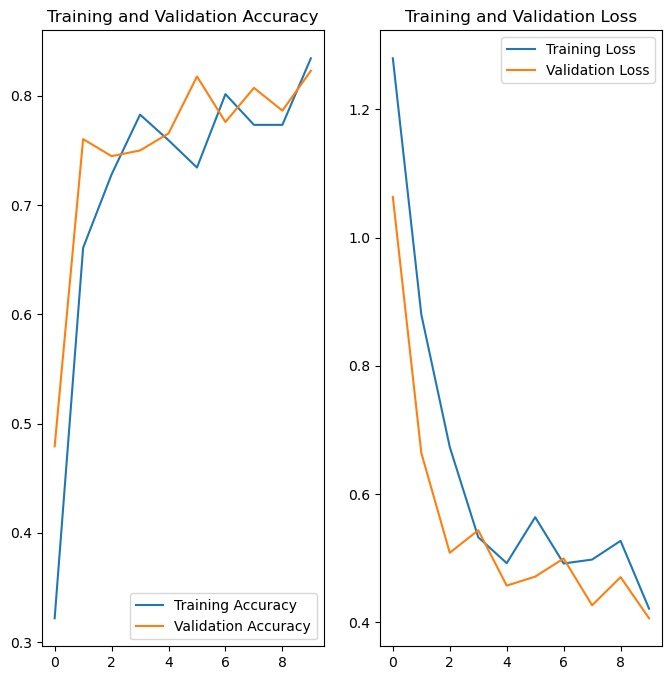

In [47]:
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS)[:10],acc[:10], label='Training Accuracy')
plt.plot(range(EPOCHS)[:10],val_acc[:10], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS)[:10],loss[:10], label='Training Loss')
plt.plot(range(EPOCHS)[:10], val_loss[:10], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: [Malignant] Pre-B
1/1 [==============================] - 1s 1s/step
predicted label: [Malignant] Pre-B


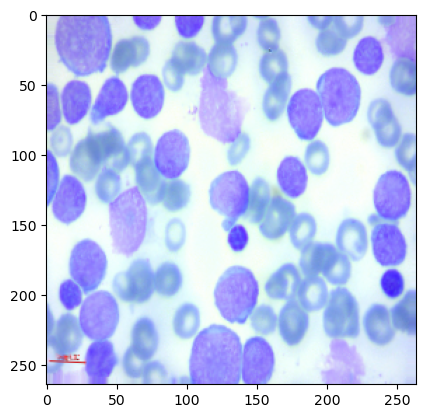

In [49]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 52ms/step


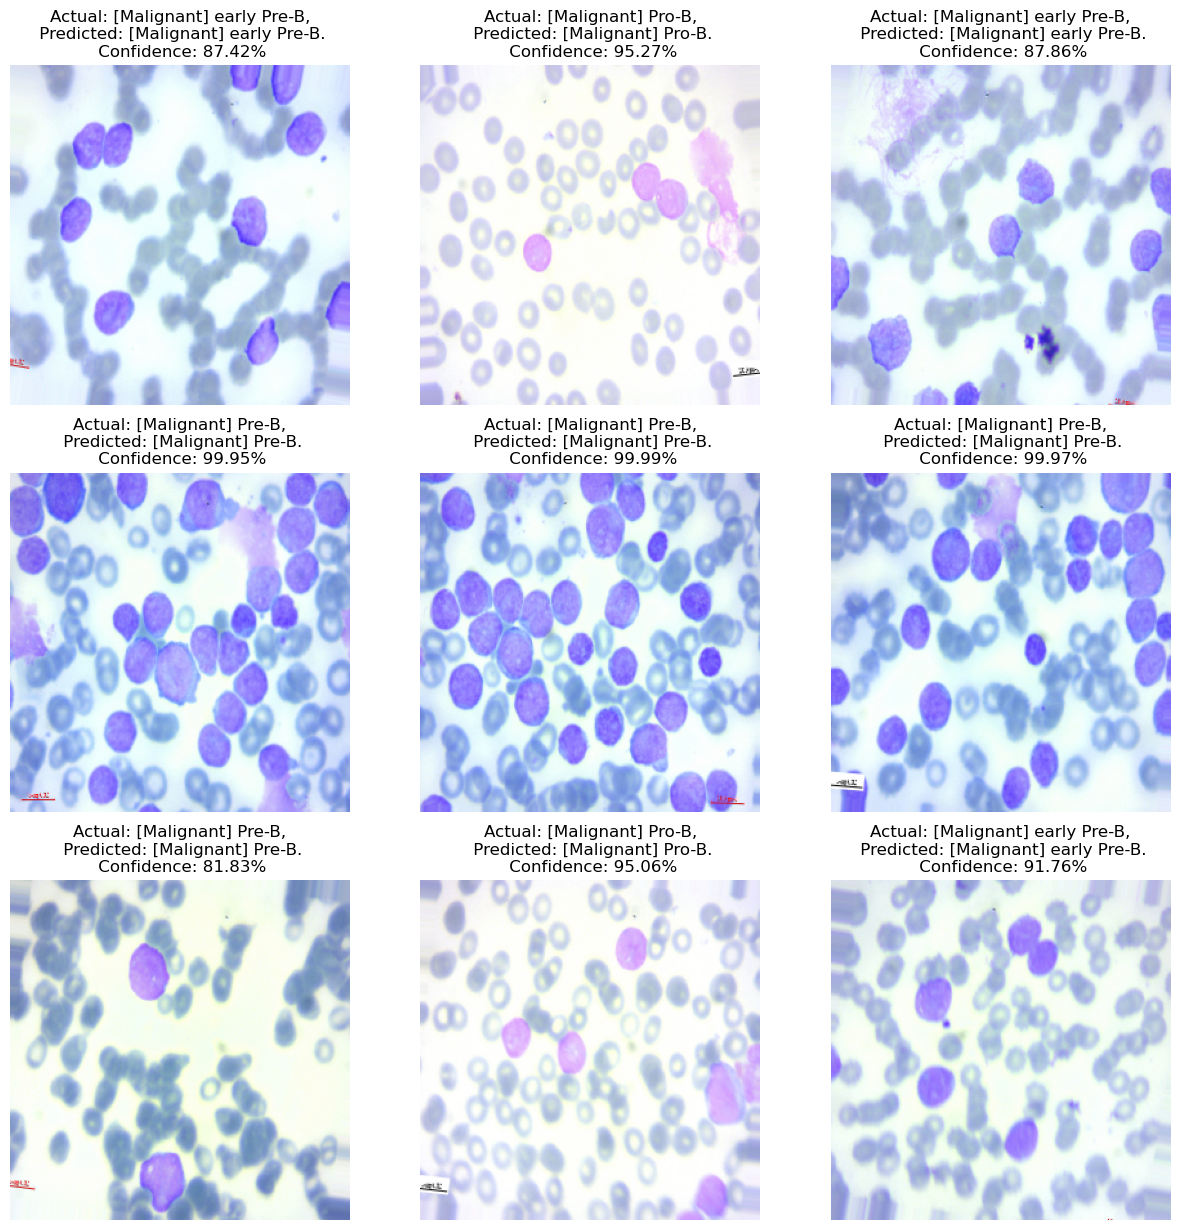

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [56]:
model.save("../leukemia.h5")